In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.style.use('ggplot')

%matplotlib inline

In [25]:
df = pd.read_csv('metrics/training_confusion.csv')

In [26]:
breeds = np.unique(df['actual'].values)
#trueVals = df['actual']
df['actual'] = [x[2:-1] for x in df['actual']]
breeds = np.unique(df['actual'].values)

In [27]:
cm = confusion_matrix(df['actual'], df['pred'], labels=breeds)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
acc = accuracy_score(df['actual'],df['pred'])
print(acc)
#sns.set(font_scale=1)

0.9203595724003887


Text(140.09375, 0.5, 'Predicted images')

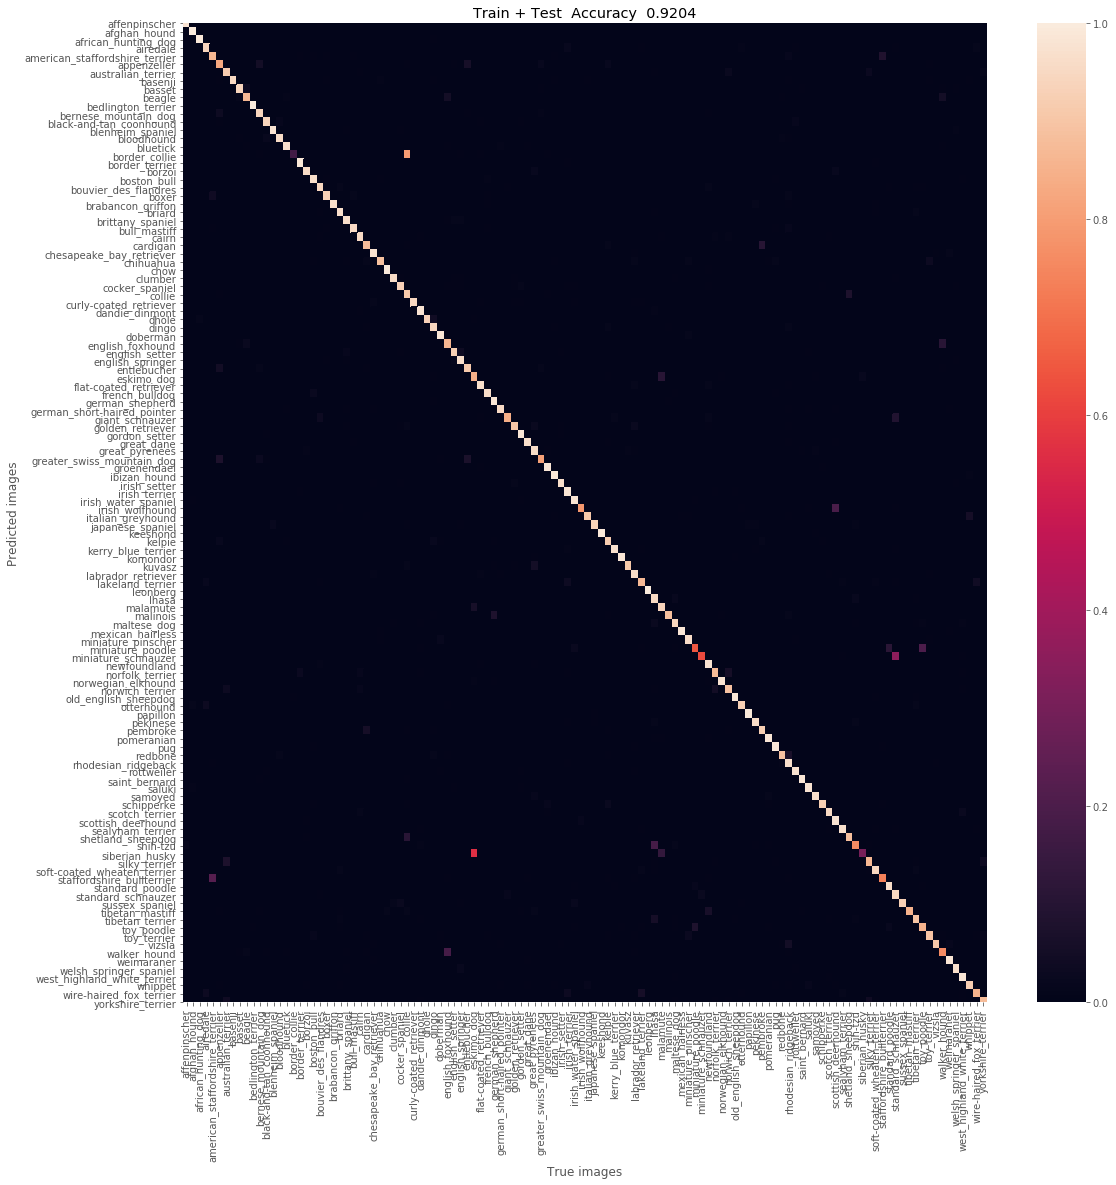

In [30]:
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm_normalized, ax=ax, yticklabels=breeds, xticklabels=breeds)
plt.title('Train+Test Confusion matrix')
plt.title('Train + Test  Accuracy  ' + str(round(acc,4)))
plt.xlabel('True images')
plt.ylabel('Predicted images')

In [31]:
fig.savefig('training_matrix.png')
df['count'] = 1

In [17]:
misclass_df = df[df['actual'] != df['pred']].groupby(['actual', 'pred']).sum().sort_values(['count'], ascending=False).reset_index()
misclass_df['pair'] = misclass_df['actual'] + ' / ' + misclass_df['pred']
misclass_df = misclass_df[['pair', 'count']].take(range(30))

misclass_df.sort_values(['count']).plot.barh(figsize=(8, 10), x=misclass_df['pair'])

KeyError: "['border_collie / collie' 'siberian_husky / eskimo_dog'\n 'miniature_schnauzer / standard_schnauzer'\n 'irish_wolfhound / scottish_deerhound' 'shih-tzu / lhasa'\n 'staffordshire_bullterrier / american_staffordshire_terrier'\n 'miniature_poodle / toy_poodle' 'walker_hound / english_foxhound'\n 'siberian_husky / malamute' 'shetland_sheepdog / collie'\n 'english_foxhound / walker_hound' 'miniature_poodle / standard_poodle'\n 'cardigan / pembroke' 'eskimo_dog / malamute'\n 'giant_schnauzer / standard_schnauzer'\n 'silky_terrier / australian_terrier'\n 'american_staffordshire_terrier / staffordshire_bullterrier'\n 'greater_swiss_mountain_dog / appenzeller' 'tibetan_terrier / lhasa'\n 'collie / shetland_sheepdog' 'toy_poodle / miniature_poodle'\n 'greater_swiss_mountain_dog / entlebucher' 'malinois / german_shepherd'\n 'malamute / eskimo_dog' 'tibetan_mastiff / newfoundland'\n 'italian_greyhound / whippet' 'pembroke / cardigan'\n 'beagle / walker_hound' 'entlebucher / appenzeller'\n 'redbone / rhodesian_ridgeback'] not in index"